# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


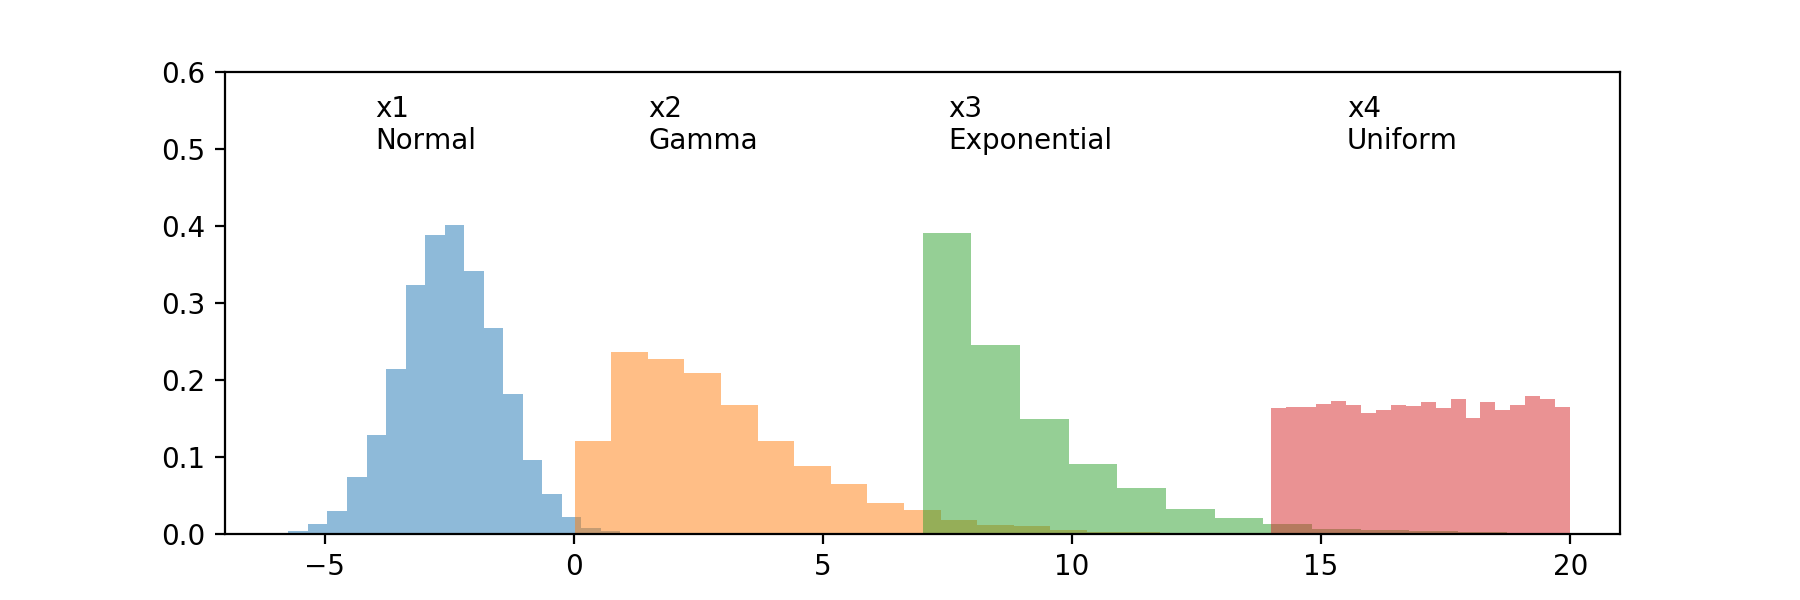

In [83]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [84]:
import matplotlib.animation as animation

n = 1000

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
xx1 = np.random.normal(-2.5, 1, n)
xx2 = np.random.gamma(2, 1.5, n)
xx3 = np.random.exponential(2, n)+7
xx4 = np.random.uniform(14, 20, n)

In [85]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    skip = 10
    if curr*skip == n: 
        a.event_source.stop()
    ax1.cla() # clear axis
    ax2.cla()
    ax3.cla()
    ax4.cla()

    names = ['Normal', 'Gamma', 'Exponential', 'Uniform']
    ax1.hist(xx1[:curr*skip], normed=True, bins=20, color='blue', alpha=0.5)
    ax2.hist(xx2[:curr*skip], normed=True, bins=20, color='orange', alpha=0.5)
    ax3.hist(xx3[:curr*skip], normed=True, bins=20, color='green', alpha=0.5)
    ax4.hist(xx4[:curr*skip], normed=True, bins=20, color='red', alpha=0.5)

    plt.tight_layout()

<IPython.core.display.Javascript object>


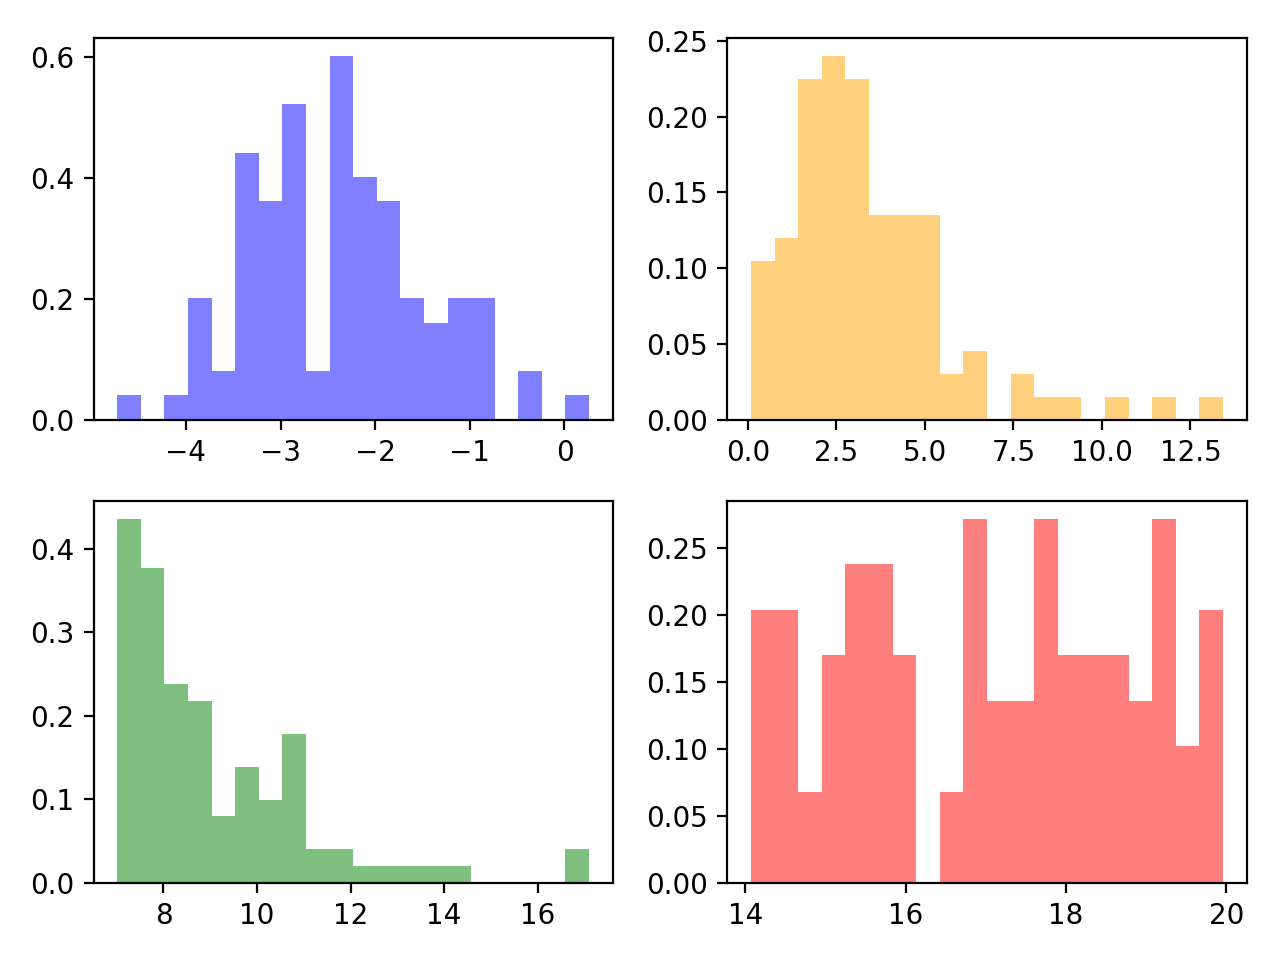

In [88]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

a = animation.FuncAnimation(fig, update, interval=10)